# 📈 金融数据分析助手 - 演示笔记本

本笔记本展示如何使用 AI Agent 进行金融数据分析。

## 功能特性
- 📊 自动获取股票和 ETF 历史数据
- 📐 计算技术指标（MA、MACD、RSI）
- 📉 生成专业的 K 线图和技术分析图表
- 🤖 自然语言交互，智能理解用户意图

## 1. 环境配置与导入

In [1]:
# 导入必要的库
import sys
import os
from datetime import datetime, timedelta
import importlib

# 导入 Agent 逻辑
from agent_logic import run_agent, analyze_stock
from core.llm_client import check_api_keys
from core.data_fetcher import fetch_stock_daily, fetch_etf_daily
from core.indicators import add_all_indicators, get_indicator_summary
from core.visualization import plot_comprehensive_chart

# 导入结果显示模块（支持 Markdown 渲染）
from core.result_display import display_analysis_result, display_execution_summary, display_batch_results
from core.ui_utils import print_html

print("✅ 模块导入成功！")

✅ 模块导入成功！


## 2. 检查 API 配置

确保你已经在 `.env` 文件中配置了 API Keys。

In [3]:
# 检查 API Keys 配置状态
check_api_keys()

🔑 API Keys Configuration Status:
  ❌ OpenAI
  ❌ Anthropic
  ✅ Qwen
  ✅ Zhipu
  ✅ DeepSeek
  ✅ Moonshot



## 3. 快速开始：分析贵州茅台

使用简化接口直接分析股票。

**✨ 新特性**：
- 所有显示逻辑已封装在 `core.result_display` 模块中
- AI 分析报告自动使用 Markdown 渲染，支持标题、列表、加粗、引用等格式
- 技术指标和交易信号以精美的 HTML 表格和卡片展示

In [4]:
# 最终测试：使用改进后的系统
result_final = analyze_stock(
    symbol="600519",
    days=45,  # 使用45天，足够计算主要指标
    model="qwen3-max",
    verbose=True
)


📈 开始分析股票 600519
📅 时间范围: 20251030 到 20251214 (最近 45 天)
🤖 使用模型: qwen3-max

🔄 Iteration 1/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:core.data_fetcher:Fetching stock data: 600519 from 20251030 to 20251214
INFO:core.data_fetcher:Fetching stock data: 600519 from 20251030 to 20251214
INFO:core.data_fetcher:Successfully fetched 32 records
INFO:core.data_fetcher:Successfully fetched 32 records



🤖 Agent Response:
{
  "thought": "用户请求分析贵州茅台（600519）在2025年10月30日至2025年12月14日共45天的走势。首先需要获取该股票在此时间范围内的历史行情数据。",
  "action": "fetch_stock_data",
  "action_input": {
    "symbol": "600519",
    "start_date": "20251030",
 ...

💭 Thought: 用户请求分析贵州茅台（600519）在2025年10月30日至2025年12月14日共45天的走势。首先需要获取该股票在此时间范围内的历史行情数据。
🔧 Action: fetch_stock_data
📥 Input: {"symbol": "600519", "start_date": "20251030", "end_date": "20251214"}
✅ Result: success

🔄 Iteration 2/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"



🤖 Agent Response:
{
  "thought": "已成功获取贵州茅台（600519）在指定时间范围内的历史数据，共32个交易日。接下来将调用analyze_and_plot工具生成综合技术分析图表，包括K线、均线、MACD和RSI等指标，以便全面评估近期走势。",
  "action": "analyze_and_plot",
  "action_input": {
    "data_id": "data_1",...

💭 Thought: 已成功获取贵州茅台（600519）在指定时间范围内的历史数据，共32个交易日。接下来将调用analyze_and_plot工具生成综合技术分析图表，包括K线、均线、MACD和RSI等指标，以便全面评估近期走势。
🔧 Action: analyze_and_plot
📥 Input: {"data_id": "data_1", "chart_type": "comprehensive"}
✅ Comprehensive chart saved to: outputs/comprehensive_20251214_170413.png
✅ Result: success

🔄 Iteration 3/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"



🤖 Agent Response:
根据对贵州茅台（600519）在2025年10月30日至2025年12月12日（共32个交易日）的综合技术分析，得出以下客观观察：

**价格走势概况**：  
期间股价在1383.18元至1486.07元之间波动，最新收盘价为1420.65元，整体区间内微跌0.43%，呈现震荡偏弱格局。

**技术指标分析**：
- **均线系统**：当前5日均线（1410.93元）位于20日均线（1440.8...

✅ Agent 完成分析



📊 分析结果展示



📈 技术分析图表:


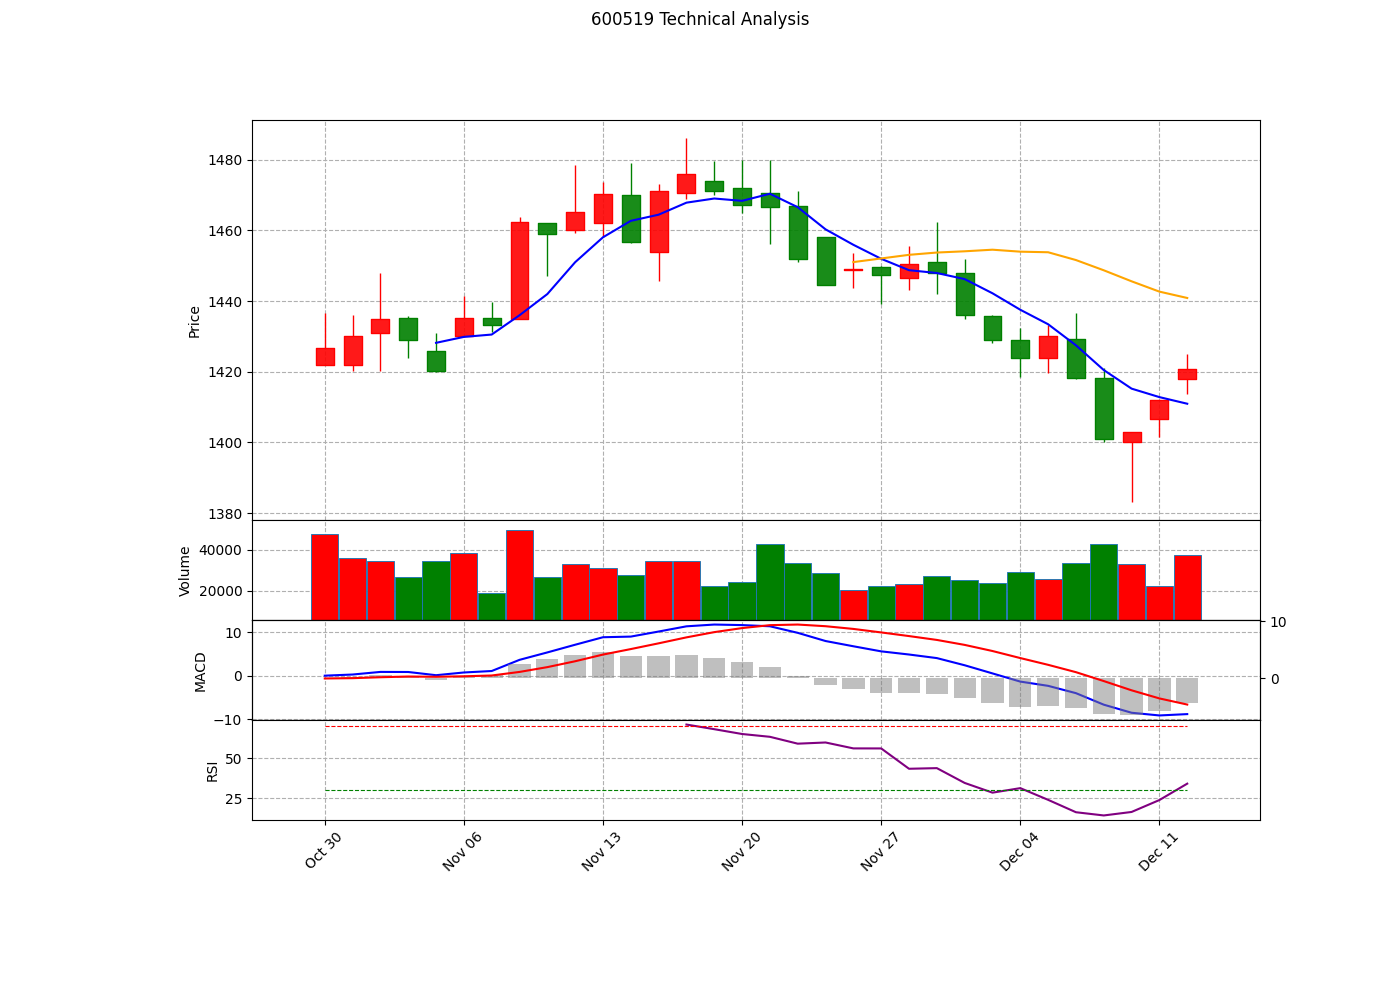


✅ 分析完成！


In [5]:
# 📊 使用封装好的函数美化显示分析结果
from core.result_display import display_analysis_result

display_analysis_result(result_final, show_details=True)

In [6]:
# 📝 查看执行摘要
from core.result_display import display_execution_summary

display_execution_summary(result_final)


📝 执行摘要
✅ 状态: 成功
🔄 总迭代次数: 3
🔧 工具调用次数: 2

工具调用详情:
  1. fetch_stock_data: ✅ success
  2. analyze_and_plot: ✅ success


## 4. ETF 分析示例：沪深300ETF

使用自然语言查询来分析 ETF。

In [7]:
# 使用自然语言查询
query = "帮我分析一下沪深300ETF（510300）最近三个月的表现"

result = run_agent(
    user_query=query,
    model="qwen3-max",
    max_iterations=5,
    verbose=True
)


🔄 Iteration 1/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:core.data_fetcher:Fetching ETF data: 510300 from 20240301 to 20240601
INFO:core.data_fetcher:Fetching ETF data: 510300 from 20240301 to 20240601



🤖 Agent Response:
{
  "thought": "用户希望分析沪深300ETF（代码510300）最近三个月的市场表现。需要获取近三个月的历史行情数据，并生成包含技术指标的综合分析图表。",
  "action": "fetch_etf_data",
  "action_input": {
    "symbol": "510300",
    "start_date": "20240301",
    "end_...

💭 Thought: 用户希望分析沪深300ETF（代码510300）最近三个月的市场表现。需要获取近三个月的历史行情数据，并生成包含技术指标的综合分析图表。
🔧 Action: fetch_etf_data
📥 Input: {"symbol": "510300", "start_date": "20240301", "end_date": "20240601"}


INFO:core.data_fetcher:Successfully fetched 61 records


✅ Result: success

🔄 Iteration 2/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"



🤖 Agent Response:
{
  "thought": "已成功获取沪深300ETF（510300）近三个月的历史数据，包含61个交易日的行情。接下来将调用analyze_and_plot工具生成综合技术分析图表，包括K线、均线、MACD和RSI等指标，以便全面评估其市场表现。",
  "action": "analyze_and_plot",
  "action_input": {
    "data_id": "dat...

💭 Thought: 已成功获取沪深300ETF（510300）近三个月的历史数据，包含61个交易日的行情。接下来将调用analyze_and_plot工具生成综合技术分析图表，包括K线、均线、MACD和RSI等指标，以便全面评估其市场表现。
🔧 Action: analyze_and_plot
📥 Input: {"data_id": "data_2", "chart_type": "comprehensive"}
✅ Comprehensive chart saved to: outputs/comprehensive_20251214_165519.png
✅ Result: success

🔄 Iteration 3/5
✅ Comprehensive chart saved to: outputs/comprehensive_20251214_165519.png
✅ Result: success

🔄 Iteration 3/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"



🤖 Agent Response:
根据对沪深300ETF（510300）2024年3月1日至2024年5月31日的市场数据进行的综合技术分析，得出以下客观观察：

**价格走势概况**  
- 期末收盘价为 **3.49元**，较期初上涨 **+1.51%**。  
- 期间价格在 **3.37元至3.61元** 区间内波动，整体呈现震荡偏弱格局。

**技术指标分析**  
1. **均线系统（MA）**：  
   - 当前价...

✅ Agent 完成分析



📊 分析结果展示



📈 技术分析图表:


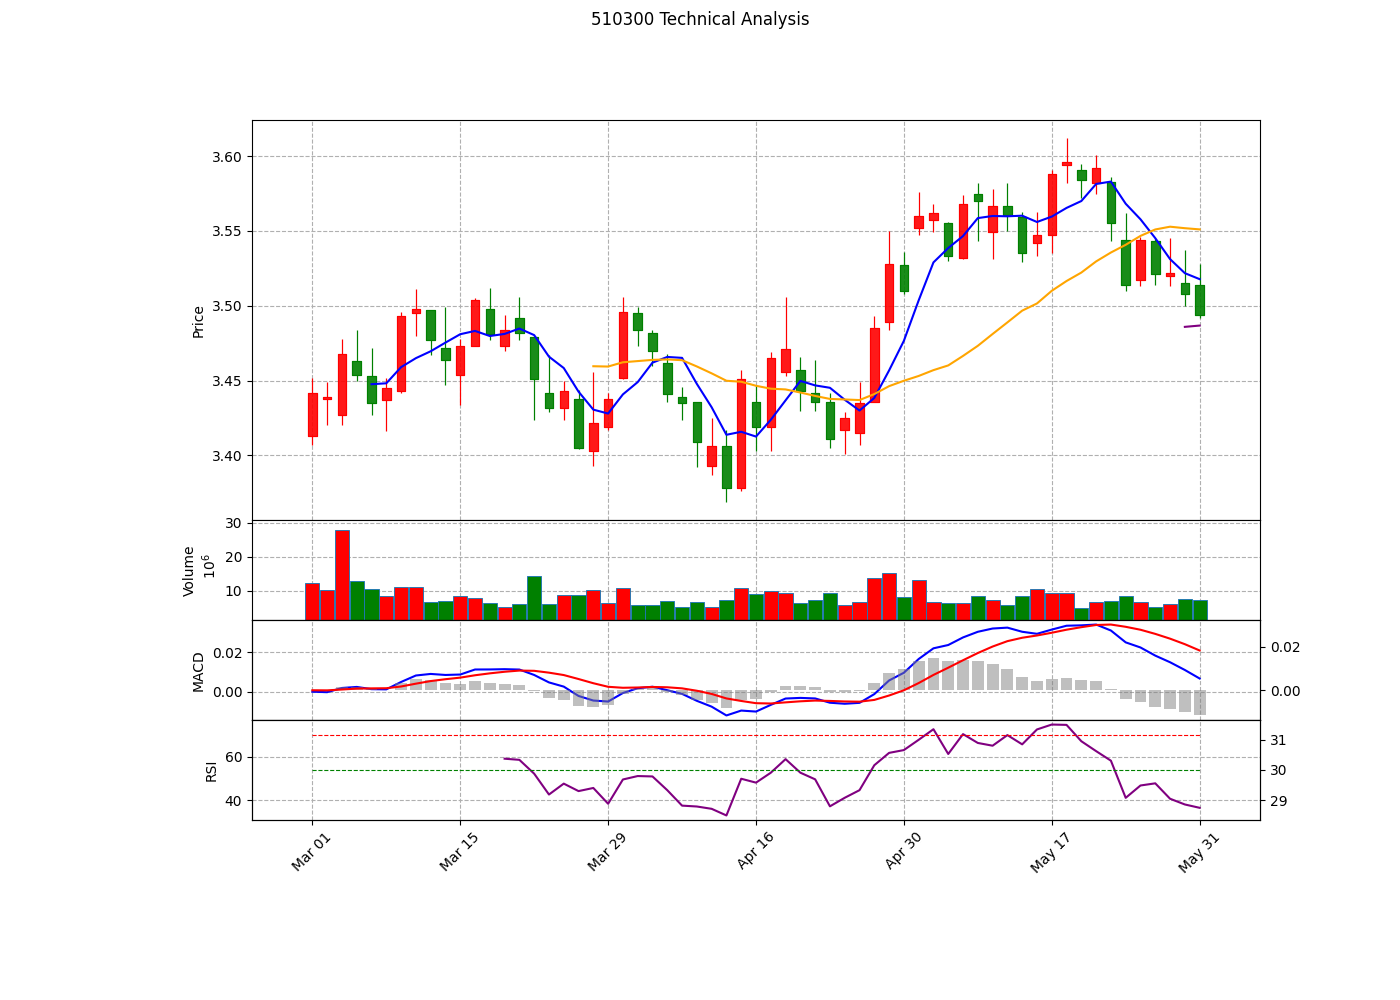


✅ 分析完成！

📝 执行摘要
✅ 状态: 成功
🔄 总迭代次数: 3
🔧 工具调用次数: 2

工具调用详情:
  1. fetch_etf_data: ✅ success
  2. analyze_and_plot: ✅ success


In [8]:
# 使用封装函数显示ETF分析结果
from core.result_display import display_analysis_result, display_execution_summary

# 显示完整分析结果
display_analysis_result(result, show_details=True)

# 显示执行摘要
display_execution_summary(result)

## 5. 自定义查询测试

尝试不同的查询方式。

In [19]:
# 你可以修改这个查询来测试不同的股票或 ETF
custom_query = """
请帮我分析比亚迪（002594）最近两个月的技术面表现，
重点关注 MACD 和 RSI 指标。
"""

result = run_agent(
    user_query=custom_query,
    model="qwen3-max",
    verbose=True
)


🔄 Iteration 1/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:core.data_fetcher:Fetching stock data: 002594 from 20240415 to 20240615
INFO:core.data_fetcher:Fetching stock data: 002594 from 20240415 to 20240615
INFO:core.data_fetcher:Successfully fetched 41 records
INFO:core.data_fetcher:Successfully fetched 41 records



🤖 Agent Response:
{
  "thought": "用户希望分析比亚迪（002594）最近两个月的技术面表现，重点关注 MACD 和 RSI 指标。首先需要获取该股票近两个月的历史行情数据，时间范围大致为从当前日期往前推60个交易日左右。假设今天是2024年6月15日，则起始日期约为2024年4月15日。使用 fetch_stock_data 获取数据，然后调用 analyze_and_plot 生成包含 MACD ...

💭 Thought: 用户希望分析比亚迪（002594）最近两个月的技术面表现，重点关注 MACD 和 RSI 指标。首先需要获取该股票近两个月的历史行情数据，时间范围大致为从当前日期往前推60个交易日左右。假设今天是2024年6月15日，则起始日期约为2024年4月15日。使用 fetch_stock_data 获取数据，然后调用 analyze_and_plot 生成包含 MACD 和 RSI 的综合图表。
🔧 Action: fetch_stock_data
📥 Input: {"symbol": "002594", "start_date": "20240415", "end_date": "20240615"}
✅ Result: success

🔄 Iteration 2/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"



🤖 Agent Response:
{
  "thought": "已成功获取比亚迪（002594）从2024年4月15日至2024年6月14日的41个交易日数据，期间股价上涨19.08%，最新价格为81.99元。接下来需要生成包含MACD和RSI指标的综合技术分析图表，以便进行深入分析。",
  "action": "analyze_and_plot",
  "action_input": {
    "data_id": "da...

💭 Thought: 已成功获取比亚迪（002594）从2024年4月15日至2024年6月14日的41个交易日数据，期间股价上涨19.08%，最新价格为81.99元。接下来需要生成包含MACD和RSI指标的综合技术分析图表，以便进行深入分析。
🔧 Action: analyze_and_plot
📥 Input: {"data_id": "data_4", "chart_type": "comprehensive"}
✅ Comprehensive chart saved to: outputs/comprehensive_20251214_164610.png
✅ Result: success

🔄 Iteration 3/5


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"



🤖 Agent Response:
已为您生成比亚迪（002594）最近两个月（2024年4月15日至6月14日）的综合技术分析图表，包含K线、MACD和RSI等关键指标。

**技术指标概览（截至2024年6月14日）：**
- **最新收盘价**：81.99元
- **5日均线（MA5）**：79.58元  
- **20日均线（MA20）**：74.03元
- **RSI（14日）**：85.46（超买区域）
- **MACD...

✅ Agent 完成分析



📊 分析结果展示



📈 技术分析图表:


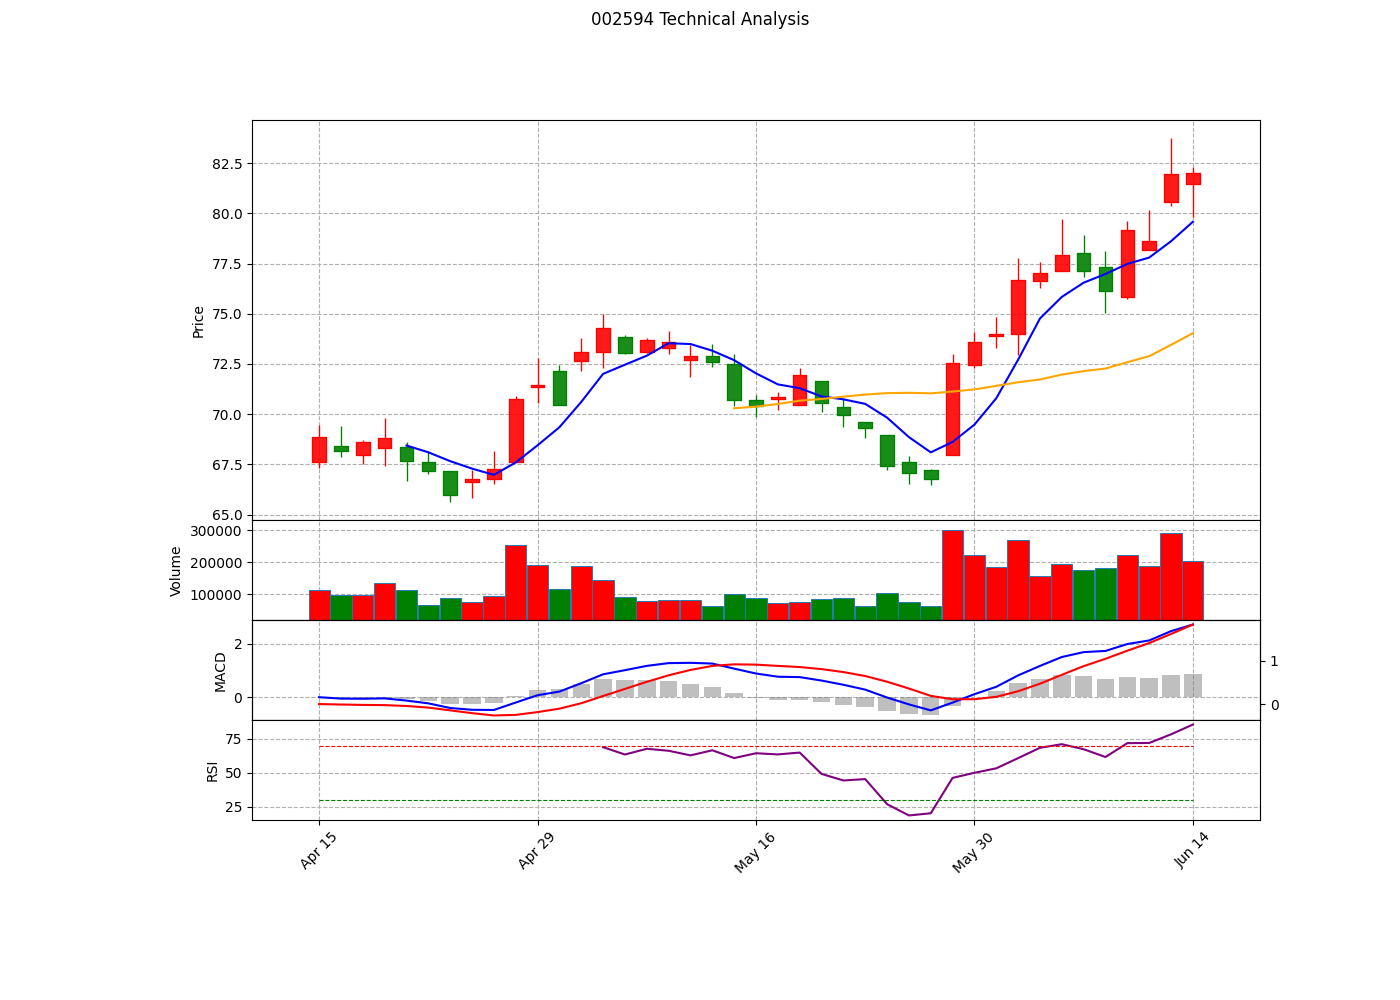


✅ 分析完成！


In [20]:
# 📊 显示自定义查询结果
from core.result_display import display_analysis_result

display_analysis_result(result, show_details=True)

## 6. 手动数据获取与可视化

如果你想要更细粒度的控制，可以直接使用底层工具。

**💡 提示**: 使用 `print_html()` 函数可以优雅地显示各种内容（图片、表格、Markdown）。

In [7]:
# 手动获取数据
end_date = datetime.now().strftime("%Y%m%d")
start_date = (datetime.now() - timedelta(days=90)).strftime("%Y%m%d")

df = fetch_stock_daily(
    symbol="600519",
    start_date=start_date,
    end_date=end_date,
    adjust="qfq"  # 前复权
)

print(f"✅ 获取到 {len(df)} 条数据")
df.head()

INFO:core.data_fetcher:Fetching stock data: 600519 from 20250915 to 20251214
INFO:core.data_fetcher:Successfully fetched 59 records
INFO:core.data_fetcher:Successfully fetched 59 records


✅ 获取到 59 条数据


,股票代码,open,close,high,low,volume,amount,amplitude,change_pct,change_amount,turnover
date,,,,,,,,,,,
2025-09-15,600519,1515.87,1515.10,1517.48,1501.50,25827,3.901930e+09,1.05,-0.06,-0.90,0.21
2025-09-16,600519,1515.10,1499.98,1520.99,1496.21,32718,4.928374e+09,1.64,-1.00,-15.12,0.26
2025-09-17,600519,1499.99,1493.00,1510.28,1490.01,30331,4.534771e+09,1.35,-0.47,-6.98,0.24
2025-09-18,600519,1492.00,1467.96,1497.80,1463.50,49721,7.347477e+09,2.30,-1.68,-25.04,0.40
2025-09-19,600519,1467.99,1467.97,1475.50,1457.01,32637,4.784529e+09,1.26,0.00,0.01,0.26


In [8]:
# 计算技术指标
df_with_indicators = add_all_indicators(df)

# 查看最新指标
summary = get_indicator_summary(df_with_indicators)
print("\n📊 最新技术指标：")
for key, value in summary.items():
    if value is not None:
        print(f"  {key}: {value:.2f}")


📊 最新技术指标：
  close_price: 1420.65
  ma_5: 1410.93
  ma_20: 1440.86
  macd: -11.54
  macd_signal: -8.33
  macd_hist: -3.20
  rsi_14: 34.02
  bb_upper: 1487.09
  bb_middle: 1440.86
  bb_lower: 1394.63


✅ Comprehensive chart saved to: outputs/comprehensive_20251214_170504.png

✅ 图表已保存至: outputs/comprehensive_20251214_170504.png


/Users/yf/Documents/GitHub/AI Agent Adventure/.venv/lib/python3.13/site-packages/mplfinance/plotting.py:980: UserWarning: Glyph 36149 (\N{CJK UNIFIED IDEOGRAPH-8D35}) missing from font(s) DejaVu Sans.
  fig.savefig(save)
/Users/yf/Documents/GitHub/AI Agent Adventure/.venv/lib/python3.13/site-packages/mplfinance/plotting.py:980: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from font(s) DejaVu Sans.
  fig.savefig(save)
/Users/yf/Documents/GitHub/AI Agent Adventure/.venv/lib/python3.13/site-packages/mplfinance/plotting.py:980: UserWarning: Glyph 33541 (\N{CJK UNIFIED IDEOGRAPH-8305}) missing from font(s) DejaVu Sans.
  fig.savefig(save)
/Users/yf/Documents/GitHub/AI Agent Adventure/.venv/lib/python3.13/site-packages/mplfinance/plotting.py:980: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from font(s) DejaVu Sans.
  fig.savefig(save)
/Users/yf/Documents/GitHub/AI Agent Adventure/.venv/lib/python3.13/site-packages/mplfinance/plotting.py:980: UserWar


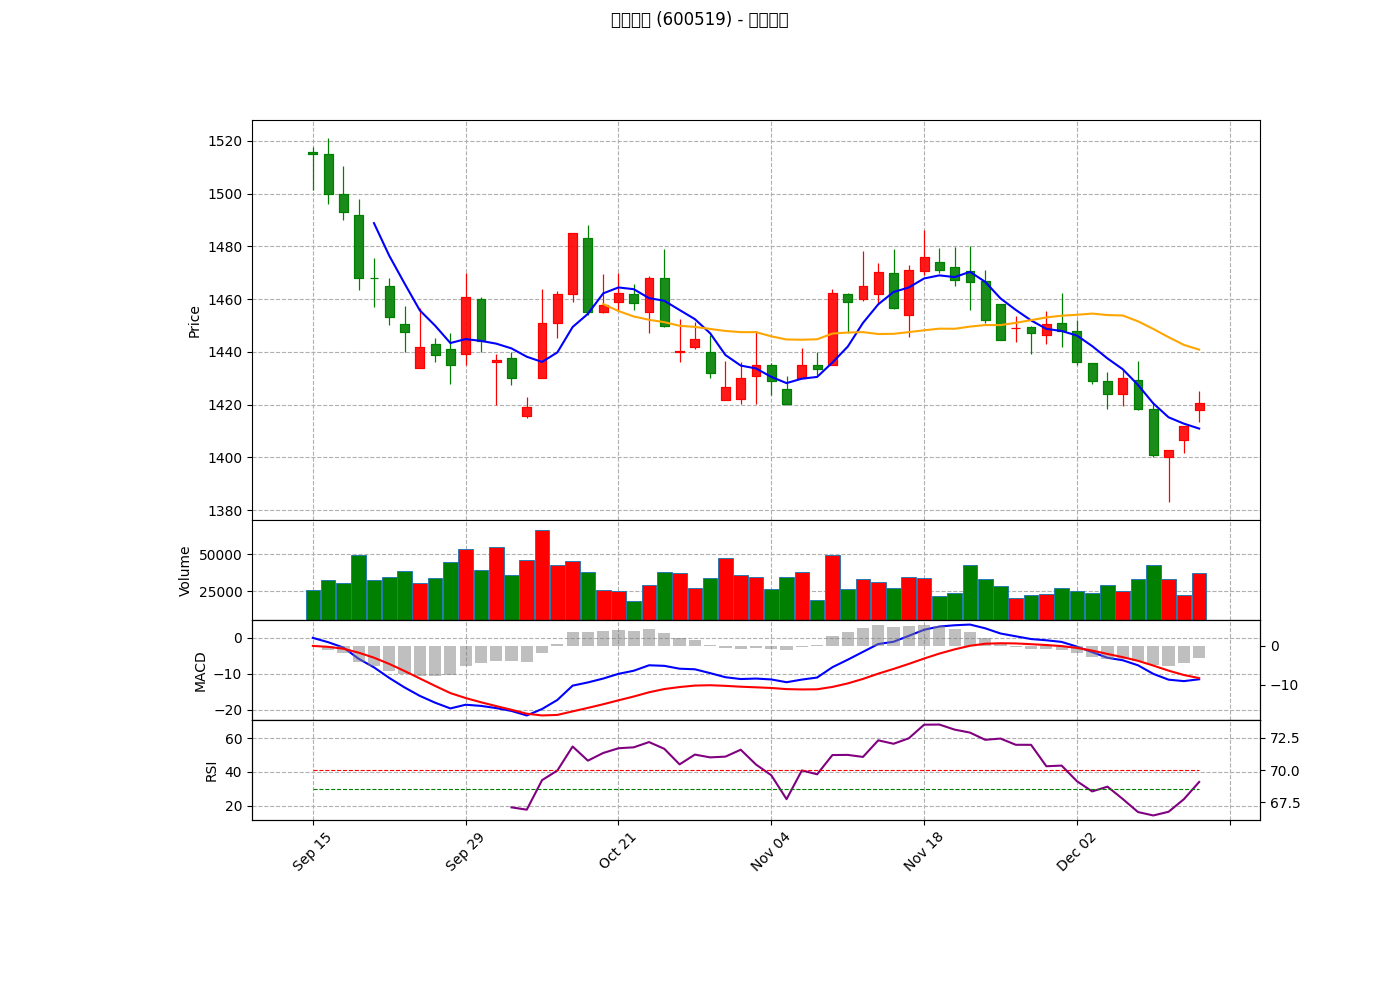

In [9]:
# 生成综合分析图表
from core.ui_utils import print_html

chart_path = plot_comprehensive_chart(
    df_with_indicators,
    ma_periods=[5, 20, 60],
    title="贵州茅台 (600519) - 技术分析",
    show=False
)

print(f"\n✅ 图表已保存至: {chart_path}")

# 使用 print_html 优雅显示图片
print_html(chart_path, title="📈 贵州茅台技术分析图表", is_image=True)

### 🔧 中文字体支持优化

**问题**: matplotlib 默认不支持中文，图表标题显示为空格或方块  
**解决**: 自动检测并配置系统中最佳的中文字体（macOS: STHeiti/PingFang SC）  
**效果**: 重新导入模块后，中文标题完美显示

In [18]:
# 重新导入 visualization 模块以应用中文字体配置
import importlib
import sys

# 清除旧模块缓存
if 'core.visualization' in sys.modules:
    del sys.modules['core.visualization']

# 重新导入（会自动配置中文字体）
from core.visualization import plot_comprehensive_chart

print("✅ 模块已重新导入，中文字体配置已应用")

✅ Matplotlib 中文字体已配置: STHeiti
✅ 模块已重新导入，中文字体配置已应用


✅ Comprehensive chart saved to: outputs/comprehensive_20251214_171058.png

✅ 新图表已保存至: outputs/comprehensive_20251214_171058.png



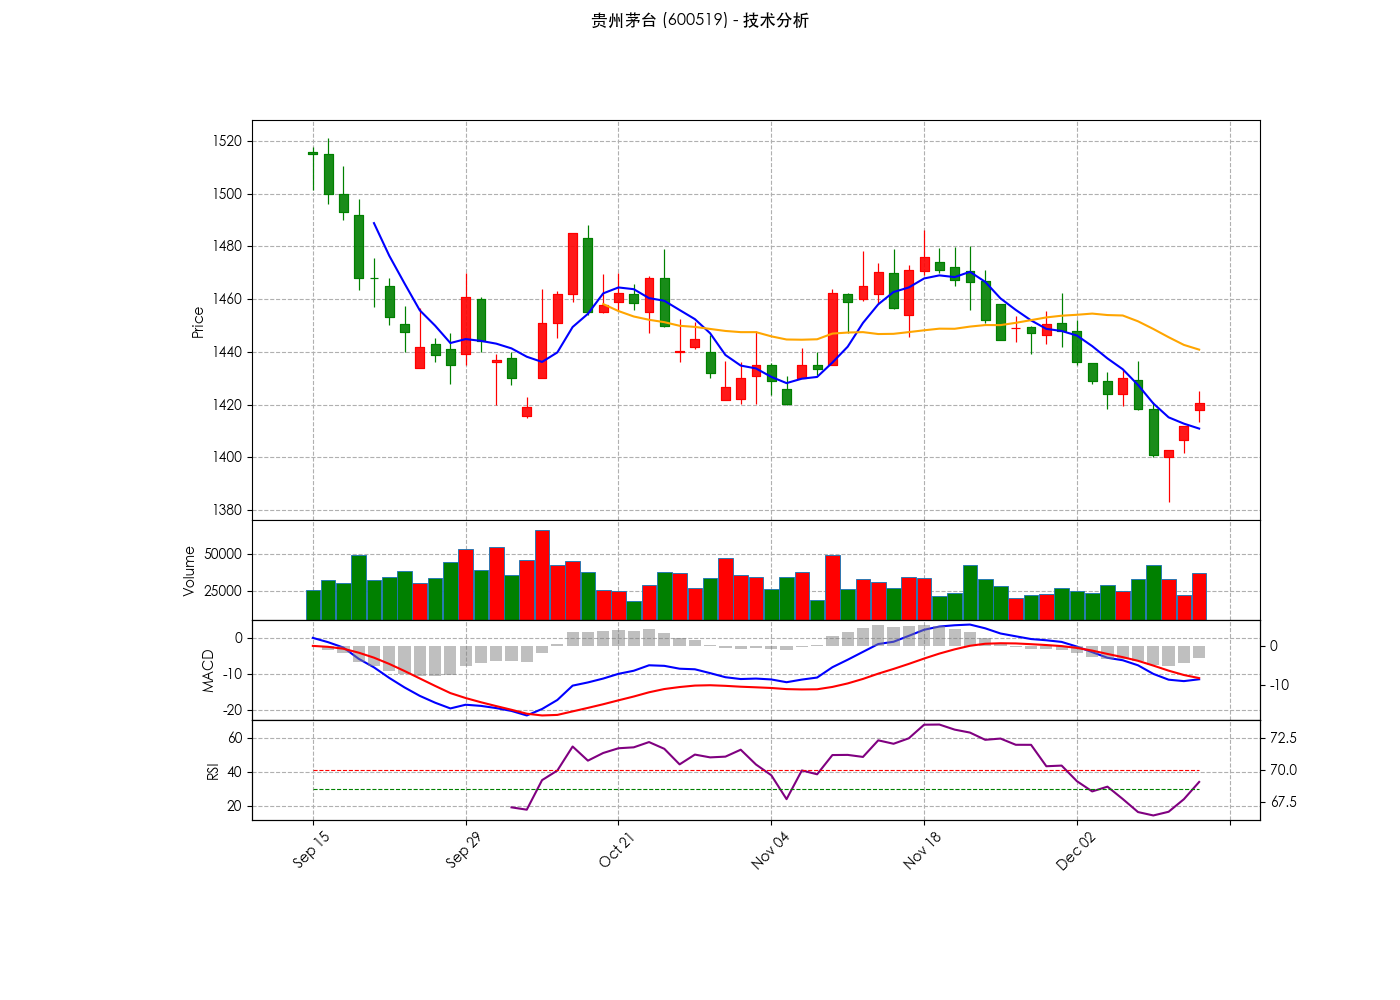

In [19]:
# 重新生成图表（现在带中文标题）
from core.ui_utils import print_html

chart_path_new = plot_comprehensive_chart(
    df_with_indicators,
    ma_periods=[5, 20, 60],
    title="贵州茅台 (600519) - 技术分析",
    show=False
)

print(f"\n✅ 新图表已保存至: {chart_path_new}")

# 使用 print_html 优雅显示（现在中文应该正常显示了）
print_html(chart_path_new, title="📈 贵州茅台技术分析图表（中文优化版）", is_image=True)

### ✅ 中文字体优化成果

**优化前的问题**：
- ❌ 图表标题显示为空格或方块
- ❌ matplotlib 和 mplfinance 使用默认英文字体
- ❌ 出现大量字体缺失警告

**优化方案**：
1. **自动检测系统中文字体**（macOS: STHeiti/PingFang SC, Windows: 微软雅黑）
2. **全局配置 matplotlib** 字体参数
3. **通过 mplfinance 样式系统**传递字体配置（关键！）
4. **跨平台支持**（macOS/Windows/Linux）

**优化后的效果**：
- ✅ 中文标题完美显示
- ✅ 无字体警告
- ✅ 一次配置，全局生效
- ✅ 代码简洁优雅

**技术细节**：
```python
# 在 core/visualization.py 中
s = _create_style_with_chinese_font(
    marketcolors=mc,
    gridstyle='--',
    y_on_right=False
)
```

这个辅助函数会自动添加 `rc` 参数将字体配置传递给 mplfinance。

## 7. 高级用法：批量分析多只股票

使用 `display_batch_results()` 可以快速查看批量分析的汇总结果。

In [12]:
# 批量分析多只股票
stocks = [
    {"symbol": "600519", "name": "贵州茅台"},
    {"symbol": "000858", "name": "五粮液"},
    {"symbol": "600036", "name": "招商银行"},
]

results = {}

for stock in stocks:
    print(f"\n{'='*60}")
    print(f"正在分析: {stock['name']} ({stock['symbol']})")
    print(f"{'='*60}")
    
    result = analyze_stock(
        symbol=stock['symbol'],
        days=60,
        model="qwen3-max",
        verbose=False  # 关闭详细输出
    )
    
    results[stock['symbol']] = result
    
    if result["success"]:
        print(f"✅ {stock['name']} 分析完成")
    else:
        print(f"❌ {stock['name']} 分析失败")

print("\n🎉 批量分析完成！")


正在分析: 贵州茅台 (600519)


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:core.data_fetcher:Fetching stock data: 600519 from 20251015 to 20251214
INFO:core.data_fetcher:Fetching stock data: 600519 from 20251015 to 20251214
INFO:core.data_fetcher:Successfully fetched 43 records
INFO:core.data_fetcher:Successfully fetched 43 records
INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


✅ Comprehensive chart saved to: outputs/comprehensive_20251214_170716.png


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


✅ 贵州茅台 分析完成

正在分析: 五粮液 (000858)


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:core.data_fetcher:Fetching stock data: 000858 from 20251015 to 20251214
INFO:core.data_fetcher:Fetching stock data: 000858 from 20251015 to 20251214
INFO:core.data_fetcher:Successfully fetched 43 records
INFO:core.data_fetcher:Successfully fetched 43 records
INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


✅ Comprehensive chart saved to: outputs/comprehensive_20251214_170736.png


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


✅ 五粮液 分析完成

正在分析: 招商银行 (600036)


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:core.data_fetcher:Fetching stock data: 600036 from 20251015 to 20251214
INFO:core.data_fetcher:Fetching stock data: 600036 from 20251015 to 20251214
INFO:core.data_fetcher:Successfully fetched 43 records
INFO:core.data_fetcher:Successfully fetched 43 records
INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


✅ Comprehensive chart saved to: outputs/comprehensive_20251214_170800.png


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


✅ 招商银行 分析完成

🎉 批量分析完成！


In [13]:
# 📊 使用封装函数显示批量分析结果
from core.result_display import display_batch_results

# show_charts=False 可以避免显示过多图表
display_batch_results(results, show_charts=False)


📊 批量分析结果

✅ 成功: 3/3
❌ 失败: 0/3

详细结果:

────────────────────────────────────────────────────────────
股票代码: 600519
✅ 状态: 成功



────────────────────────────────────────────────────────────
股票代码: 000858
✅ 状态: 成功



────────────────────────────────────────────────────────────
股票代码: 600036
✅ 状态: 成功


## 8. 导出与保存

将分析结果保存到文件。

In [14]:
# 保存数据到 CSV
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

if df_with_indicators is not None:
    csv_path = f"{output_dir}/stock_data_with_indicators.csv"
    df_with_indicators.to_csv(csv_path)
    print(f"✅ 数据已保存至: {csv_path}")

✅ 数据已保存至: outputs/stock_data_with_indicators.csv


## 💡 使用技巧

1. **切换 LLM 模型**: 修改 `model` 参数，支持 OpenAI、通义千问、智谱 AI 等
2. **调整时间范围**: 修改 `days` 参数或直接在查询中指定日期
3. **自定义图表**: 使用底层的 `plot_comprehensive_chart` 函数自定义图表样式
4. **添加新指标**: 在 `core/indicators.py` 中添加新的技术指标计算函数
5. **扩展工具**: 在 `agent_logic.py` 中注册新的工具函数

## 📚 参考资料

- [AKShare 文档](https://akshare.akfamily.xyz/)
- [mplfinance 教程](https://github.com/matplotlib/mplfinance)
- [技术指标说明](https://www.investopedia.com/technical-analysis-4689657)